In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.Collecting pandas
   ---------------------------------------- 0.0/11.6 MB ? eta -:--:--
    --------------------------------------- 0.2/11.6 MB 6.1 MB/s eta 0:00:02
   - -------------------------------------- 0.5/11.6 MB 8.5 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.6 MB 9.1 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.6 MB 10.0 MB/s eta 0:00:01
   -------- ------------------------------- 2.5/11.6 MB 13.0 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.6 MB 15.0 MB/s eta 0:00:01
   ---------------- ----------------------- 4.9/11.6 MB 17.2 MB/s eta 0:00:01
   --------------------- ------------------ 6.2/11.6 MB 18.8 MB/s eta 0:00:01
   ------------------------- -------------- 7.5/11.6 MB 19.2 MB/s eta 0:00:01
   ------------------------------ --------- 8.9/11.6 MB 21.0 MB/s eta 0:00:01
   ---------------------------------- ----- 10.0/11.6 MB 21.2 MB/s eta


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 294.9/294.9 kB 6.2 MB/s eta 0:00:00


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore') 

In [29]:
df = sns.load_dataset('titanic')

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [56]:
df['age'].fillna(df['age'].median(), inplace=True ) 

In [33]:
df.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [34]:
df.dropna(subset=['survived']).dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [25]:
df = df[['survived', 'pclass', 'age', 'parch']] 

In [26]:
df.head()

,survived,pclass,age,parch
0,0,3,22.0,0
1,1,1,38.0,0
2,1,3,26.0,0
3,1,1,35.0,0
4,0,3,35.0,0


In [17]:
X = df[['pclass', 'age', 'parch']]
y = df['survived'] 

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42 ) 

In [37]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train) 

DecisionTreeClassifier()

In [38]:
y_pred = model.predict(X_test) 

In [41]:
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy {acc * 100: .2f}%" )

Accuracy  67.04%


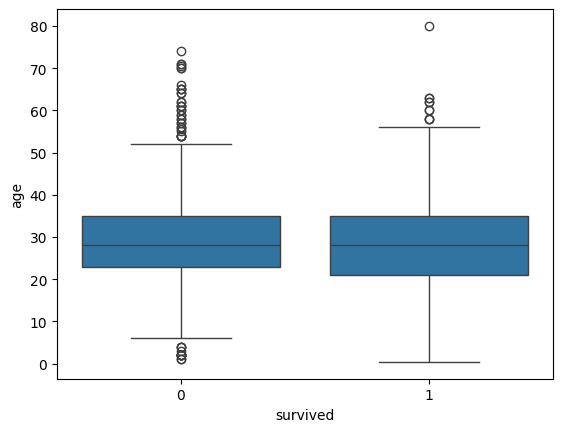

In [50]:
sns.boxplot(x='survived', y='age', data=df) 
plt.show()

<Axes: xlabel='age', ylabel='Count'>

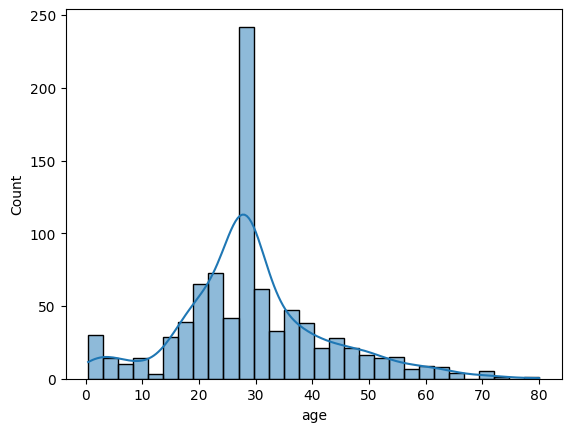

In [53]:
sns.histplot(df['age'], kde=True)